In [4]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, names=col_names)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age' ]
y = pima.label
X = pima[feature_cols]

In [9]:
#Splitting X and y into test and training data 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
#Traina logistic regression model using training set
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#Finding accuracy of the prediction
from sklearn import metrics
y_predict = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.692708333333


In [14]:
#Null Accurancy is the accurancy which will achieved by always predicting the most frequent class
#Finding underlying distribution
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [12]:
#Accuracy of predicting 1s
print(y_test.mean())

0.3229166666666667


In [15]:
#Accuracy of prediction 1
print(1-y_test.mean())
k2 = 1-y_test.mean()

0.6770833333333333


In [16]:
#Null Accuracy for binary classification(0/1)
max(y_test.mean(), (1 - y_test.mean()))

0.6770833333333333

In [20]:
#Null Accuracy for multi class classification
Nmulti = y_test.value_counts().head(1)/len(y_test)
print (Nmulti)

0    0.677083
Name: label, dtype: float64


In [25]:
print('True:', y_test.values[0:25])
print('Pred:', y_predict[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
#Confusion Matrix is one of the parameters to know the performace of your classification model 
#In confusion matrix, the first paramaeter passed is always True and then the predicted one
print (metrics.confusion_matrix(y_test, y_predict))

[[118  12]
 [ 47  15]]


In [27]:
#Saving confusion matrix and slicing it into four pieces for TP,TN,FP,FN
confusion = metrics.confusion_matrix(y_test, y_predict)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [32]:
print(TP)

15


In [36]:
#How often is the classifier correct #Classification Accuracy
print ((TP+TN)/float(TP+TN+FP+FN))

0.692708333333


In [37]:
#How often is the classifier incorrect known as misclassification rate #Classification error
print ((FP+FN)/(TP+TN+FP+FN))

0.307291666667


In [40]:
#Sensitivity - How often your model predicts correctly, when actual value is positive
#This is known as recall_score
print ((TP)/(FN+TP))
print (metrics.recall_score(y_test, y_predict))

0.241935483871
0.241935483871


In [41]:
#Specificity - How often your model predicts correctly, when actual value i 0 or negative
print ((TN)/(TN +FP))

0.907692307692


In [43]:
#False positive rate - How often your model predicts incorrectly when actual value is true or positive
print ((FP)/(TN +FP))

0.0923076923077


In [45]:
#Precision - How precise is your model when predicting positive instances
print ((TP)/(TP+FP))

0.555555555556


In [48]:
#Adjusting the classification threshold
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [49]:
#print the predictive probability of first 10 class memberships
logreg.predict_proba(X_test)[0:10, :]


array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [50]:
#print the predictive probability of first 10 features for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [54]:
#store the predict probability of class 1 
y_predict_proba = logreg.predict_proba(X_test)[:,1]

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

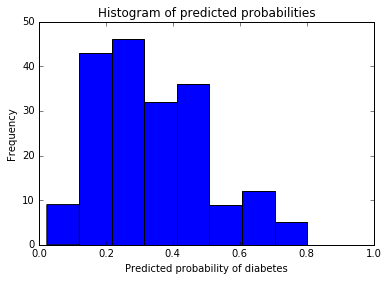

In [55]:
plt.hist(y_predict_proba,bins=8)
plt.xlim(0,1)
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.title('Histogram of predicted probabilities')

In [56]:
#We see the probability of predicting 1 is more at .3 
#We will decrease the threshold so as to increase the sensitivity of your model by using binarize method
from sklearn.preprocessing import binarize

In [59]:
y_pred_class = binarize([y_predict_proba], 0.3)[0]

In [63]:
#Printing predictive probabilitis of the 1 class
print(y_predict_proba[0:10])

[ 0.36752429  0.28356344  0.28895886  0.4141062   0.15896027  0.17065156
  0.49889026  0.51341541  0.27678612  0.67189438]


In [64]:
#Print the predictions made after applying binarize function
print(y_pred_class[0:10])

[ 1.  0.  0.  1.  0.  0.  1.  1.  0.  1.]


In [71]:
#Printing older predictions for comparison
print(y_predict[0:10])

[0 0 0 0 0 0 0 1 0 1]


In [70]:
#Printing older confusion matrix
print(confusion)

[[118  12]
 [ 47  15]]


In [72]:
#Creating new confusion matrix for new predictions after binarize function
confusion_new = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion_new)

[[80 50]
 [16 46]]


In [77]:
#Sensitivity after binarize(TP/FN+TP)
print ((confusion_new[1,1])/(confusion_new[1,0]+confusion_new[1,1]))
print(metrics.recall_score(y_test,y_pred_class))

0.741935483871
0.741935483871


In [78]:
#Specifivity after binarize
print((80)/(80+50))


0.6153846153846154
